In [4]:
import librosa 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import torch
import torchaudio

c:\users\user\anaconda3\envs\sba_speech\lib\site-packages\torchaudio\extension\extension.py:14: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


In [7]:
# dwonload audio dataset
test_dataset = torchaudio.datasets.LIBRISPEECH("./", url="test-clean", download = True) 
# download = True 다운로드할 것이 없으면 이것을 실행.

100.0%


In [9]:
# 1. waveform
# 2. sample rate
# 3. transcript
# 4. speaker_id
# 5. chapter_id
# 6. utterace_id
test_dataset[0]

(tensor([[0.0003, 0.0003, 0.0004,  ..., 0.0021, 0.0021, 0.0016]]),
 16000,
 'HE HOPED THERE WOULD BE STEW FOR DINNER TURNIPS AND CARROTS AND BRUISED POTATOES AND FAT MUTTON PIECES TO BE LADLED OUT IN THICK PEPPERED FLOUR FATTENED SAUCE',
 1089,
 134686,
 0)

In [10]:
test_dataset[0][0].shape

torch.Size([1, 166960])

In [15]:
len(test_dataset[0][0][0])/test_dataset[0][1]

10.435

In [27]:
audioData = test_dataset[0][0][0]
sr = test_dataset[0][1]

In [19]:
import IPython.display as ipd

In [20]:
ipd.Audio(audioData, rate=sr)
# rate = 8000으로 주면 시간을 늘어나며, 느리게 재생
# rate = 32000으로 주면 시간이 줄어들고, 빠르게 재생 

In [22]:
# resample(down sampling)
# 16000 --> 8000
y_8k = librosa.resample(audioData.numpy(), sr, sr // 2) 
len(y_8k)

83480

In [31]:
ipd.Audio(y_8k, rate=8000) 
# 시간은 정상 속도이지만 음질이 안좋아 진다  

In [32]:
y_2k = librosa.resample(audioData.numpy(), sr, sr // 8) 
len(y_2k)

20870

In [33]:
ipd.Audio(y_2k, rate=2000) 
# 2000으로 낮췄을때는 음질이 더 안좋아진다.

In [34]:
audioData

tensor([0.0003, 0.0003, 0.0004,  ..., 0.0021, 0.0021, 0.0016])

In [36]:
# normalization
audio_np = audioData.numpy()
norm_audio = audio_np / max(np.abs(audio_np))
ipd.Audio(norm_audio, rate = sr)

In [37]:
norm_audio # 정규화를 했지만 음질은 크게 변하지 않는다. 

array([0.00051375, 0.00046705, 0.00056046, ..., 0.00322264, 0.00322264,
       0.00242866], dtype=float32)

In [38]:
# 음질의 차이가 크지 않지만, 메모리를 효율적으로 사용할 때의 방법
# 최근에는 사용하지 않음
Bit = 8
max_value = 2 ** (Bit -1) 

quantized_audio = norm_audio * max_value
quantized_audio = np.round(quantized_audio).astype(int)
quantized_audio = np.clip(quantized_audio, - max_value, max_value -1)
# numpy.clip(array, min, max) array 내의 element들에 대해서
# min 값 보다 작은 값들을 min값으로 바꿔주고, max 값 보다 큰 값들을 max값으로 바꿔주는 함수.
ipd.Audio(quantized_audio, rate = sr)

In [39]:
quantized_audio[20000:20100]

array([ -8,  -6,  -7, -10, -11,  -8,  -6,  -7,  -8,  -7,  -5,  -6,  -8,
       -10, -10,  -9,  -9, -10, -11, -12, -11, -11, -11, -12, -13, -13,
       -12, -10,  -9, -10, -12, -11,  -9,  -8,  -8,  -8,  -6,  -1,   3,
         4,   0,  -2,  -1,   4,   8,   9,   8,   8,   9,  11,  12,  11,
         8,   7,   7,   9,  11,  10,   9,   7,   7,   6,   6,   5,   5,
         5,   5,   5,   5,   5,   4,   4,   3,   3,   3,   3,   4,   4,
         4,   4,   3,   2,   3,   3,   4,   3,   3,   2,   3,   3,   3,
         2,   2,   1,   1,   1,   1,   1,   1,   0])

In [40]:
import librosa.display 

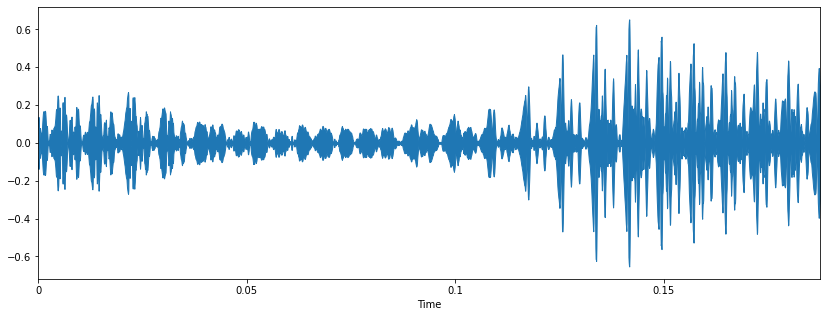

In [45]:
audio_np = audio_np

fig = plt.figure(figsize=(14,5))
librosa.display.waveplot(audio_np[10000:13000], sr=sr)

In [47]:
# Fourier by librosa 
# 20 ~ 40ms 단위 프레임 분할
# 50% 씩 겹치게 프레임 분할

S = librosa.core.stft(audio_np, n_fft=1024, hop_length = 512, win_length = 1024)
# n_fft 얼마만큼 단위로 쪼갤 것인가.
# hop_length 얼마나 겹칠것인지 
# win_length 겹치는 공간의 부분의 영향
audio_np.shape, S.shape

((166960,), (513, 327))

In [48]:
S

array([[ 1.3059823e-01+0.0000000e+00j, -2.6658531e-02+0.0000000e+00j,
        -6.8427049e-02+0.0000000e+00j, ...,
        -1.2321862e-02+0.0000000e+00j, -4.3136794e-02+0.0000000e+00j,
        -2.0796345e-01+0.0000000e+00j],
       [-1.3280846e-01-1.4094628e-18j,  2.2805320e-02+7.7231968e-04j,
         2.5826484e-02-5.7661552e-02j, ...,
        -2.7076737e-03+3.0433716e-02j,  4.5179068e-03-5.7724986e-02j,
         1.2107487e-01-9.7170649e-03j],
       [ 1.8200853e-01-2.5122670e-18j, -1.7555403e-02-1.6775675e-02j,
         7.5619034e-03+4.8495241e-02j, ...,
         2.1177871e-02-3.0608548e-02j,  3.4986310e-02+1.9039733e-02j,
        -4.8906382e-02+4.3677524e-02j],
       ...,
       [-9.7518542e-04+3.4386263e-19j, -4.8430110e-04+3.7835254e-03j,
        -2.6684725e-03+2.7823038e-04j, ...,
        -1.0073115e-03+2.2741656e-03j, -2.0952031e-03-3.2153842e-03j,
         3.4902098e-03+1.5396820e-03j],
       [ 1.9302913e-06+1.4094628e-18j, -3.4029603e-03-3.9486312e-03j,
         6.2428473e-04

In [49]:
# 1.3059823e-01+0.0000000e+00j 일때 허수(0000000e+00j )의 정보를 없앤다
D = np.abs(S) ** 2
D , D.shape

(array([[1.70558989e-02, 7.10677297e-04, 4.68226103e-03, ...,
         1.51828295e-04, 1.86078297e-03, 4.32487987e-02],
        [1.76380873e-02, 5.20679110e-04, 3.99186183e-03, ...,
         9.33542615e-04, 3.35258571e-03, 1.47535447e-02],
        [3.31271067e-02, 5.89615491e-04, 2.40897061e-03, ...,
         1.38538529e-03, 1.58655318e-03, 4.29956010e-03],
        ...,
        [9.50986589e-07, 1.45496115e-05, 7.19815762e-06, ...,
         6.18650574e-06, 1.47285718e-05, 1.45521853e-05],
        [3.72602470e-12, 2.71718291e-05, 7.47806666e-07, ...,
         6.54138876e-06, 1.46521552e-05, 5.73009784e-05],
        [1.38194409e-07, 3.76097523e-05, 1.34992206e-05, ...,
         2.30791120e-05, 1.51040977e-05, 8.37575499e-05]], dtype=float32),
 (513, 327))

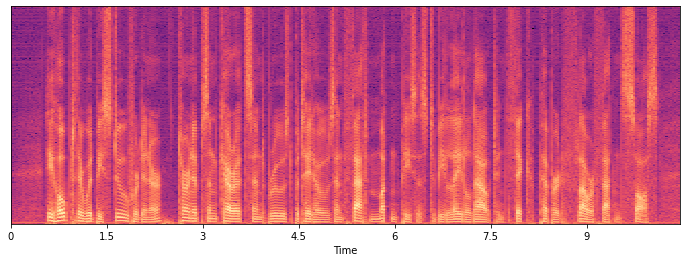

In [51]:
# 사람이 인식할 수 있는 데시벨의 형태롬 만든다.
# 즉, 주파수가 낮은 대역에서는 민감,  주파수가 높은 대역에서는 둔감
log_S = librosa.power_to_db(S, ref=np.max)

# 시각화
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=16000, x_axis="time")

In [56]:
def frame_audio(audio, FFT_size=1024, hop_size=20, sample_rate=22050):
    audio = np.pad(audio, int(FFT_size/2), mode="reflect")
    frame_len = np.round(sample_rate*hop_size/1000).astype(int)
    frame_num = int((len(audio)- FFT_size)/frame_len) +1
    frames = np.zeros((frame_num, FFT_size))
    
    for n in range(frame_num):
        frames[n] = audio[n *f rame_len: n * frame_len + FFT_size]
    return frames

audio_framed = frame_audio(audio_np)
print("Framed audio shape : {}".format(audio_framed.shape))

Framed audio shape : (379, 1024)


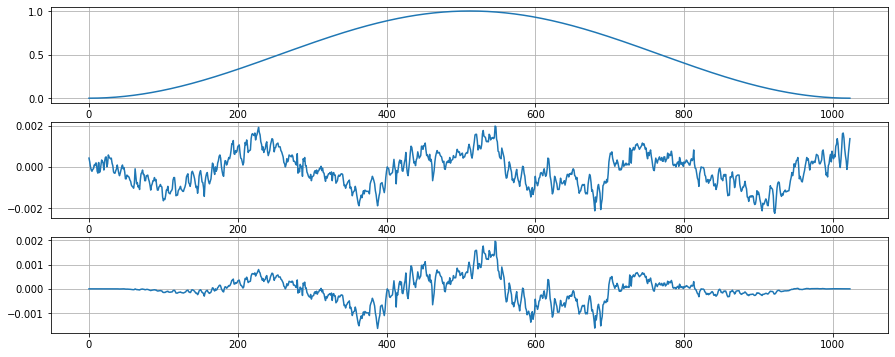

In [61]:
from scipy import signal

window = signal.get_window('han', 1024, fftbins = True)
audio_win = audio_framed * window
ind = 2

#frame plot
plt.figure(figsize=(15,6))
plt.subplot(3,1,1)
plt.plot(window)
plt.grid(True)

#frame plot
plt.subplot(3,1,2)
plt.plot(audio_framed[ind])
plt.grid(True)

#frame plot
plt.subplot(3,1,3)
plt.plot(audio_win[ind])
plt.grid(True)


In [62]:
# mel filter vector
D = D

In [66]:
mel_basis = librosa.filters.mel(16000, 1024, n_mels=40)
mel_S = np.dot(mel_basis, D)
mel_S.shape

(40, 327)

c:\users\user\anaconda3\envs\sba_speech\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\user\anaconda3\envs\sba_speech\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


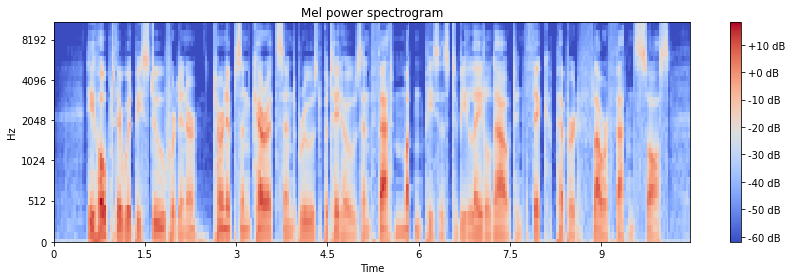

In [69]:
plt.figure(figsize=(12,4))
log_mel_S = librosa.power_to_db(mel_S)
librosa.display.specshow(log_mel_S, sr=sr, x_axis='time', y_axis="mel")
plt.title("Mel power spectrogram")
plt.colorbar(format="%+02.0f dB")
plt.tight_layout()

(13, 327)


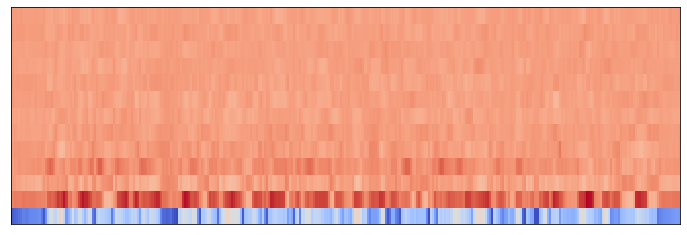

In [71]:
mfcc = librosa.feature.mfcc(S=log_mel_S, n_mfcc=13)
mfcc = mfcc.astype(np.float32) # to save the memory (64 to 32 bits)

plt.figure(figsize=(12,4))
print(mfcc.shape)
librosa.display.specshow(mfcc)